In [1]:
!pip install -q sklearn #sklearn already installed in conda 

In [2]:
%tensorflow_version 2.x # this is specific to google collav only 

UsageError: Line magic function `%tensorflow_version` not found.


In [2]:
from __future__ import absolute_import, division, print_function, unicode_literals
import tensorflow as tf 
import numpy as np #multi dimensional calculations for matrices 
import pandas as pd #manipulate data sets 
import matplotlib.pyplot as plt #visualise data 
from IPython.display import clear_output #just to clear output 
from six.moves import urllib 
import tensorflow.compat.v2.feature_column as fc #required for linear regression
print(tf.version)

<module 'tensorflow._api.v2.version' from '/home/gurjeet/Applications/Anaconda/lib/python3.9/site-packages/tensorflow/_api/v2/version/__init__.py'>


In [4]:
String = tf.Variable("Test value", tf.string)
RankVar = tf.Variable(["Test value 1, Test value 2"], tf.string)
ShapeVar = tf.Variable([[[123]], [[567]], [[626]]], tf.string)
print(tf.rank(ShapeVar))
ShapeVar.shape
print(tf.ones([3,2,1], tf.int64))

tf.Tensor(3, shape=(), dtype=int32)
tf.Tensor(
[[[1]
  [1]]

 [[1]
  [1]]

 [[1]
  [1]]], shape=(3, 2, 1), dtype=int64)


In [5]:
#Load test data
dftrain = pd.read_csv('https://storage.googleapis.com/tf-datasets/titanic/train.csv') # training data
dfeval = pd.read_csv('https://storage.googleapis.com/tf-datasets/titanic/eval.csv') # testing data
#pd.read_csv is a dataframe specific to pandas library 
# print(dftrain.head())
#popping off survived column from dataframe to a different object for test and training data 
ytrain=dftrain.pop("survived")
yeval=dfeval.pop("survived")
print(dftrain.shape)
dftrain.loc[0]
dftrain["sex"]

(627, 9)


0        male
1      female
2      female
3      female
4        male
        ...  
622      male
623      male
624    female
625    female
626      male
Name: sex, Length: 627, dtype: object

Text(0.5, 0, '% survive')

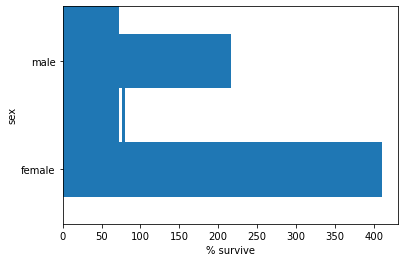

In [8]:
dftrain.age.hist(bins=20)
dftrain.sex.value_counts().plot(kind="barh")
dftrain["class"].value_counts().plot(kind="barh")
pd.concat([dftrain, ytrain], axis=1).groupby('sex').survived.mean().plot(kind='barh').set_xlabel('% survive')

In [10]:
#dividing columns in categorical and numerical types for pandas to sort through it 
CATEGORICAL_COLUMNS=['sex', 'n_siblings_spouses', 'parch', 'class', 'deck',
       'embark_town', 'alone']
NUMERICAL_COLUMNS=['age', 'fare']

#convert it to feature column 
feature_columns=[]  #feature column is fed to linear estimator 
#it is a numpy array

#looping through categorical and numerical column to make a feature column 
for cname in CATEGORICAL_COLUMNS:
    vocabulary=dftrain[cname].unique() #get unique values of particular column as list
    feature_columns.append(tf.feature_column.categorical_column_with_vocabulary_list(cname, vocabulary))
    
for cname in NUMERICAL_COLUMNS:
    feature_columns.append(tf.feature_column.numeric_column(cname, dtype=tf.float32))

print(feature_columns)

[VocabularyListCategoricalColumn(key='sex', vocabulary_list=('male', 'female'), dtype=tf.string, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='n_siblings_spouses', vocabulary_list=(1, 0, 3, 4, 2, 5, 8), dtype=tf.int64, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='parch', vocabulary_list=(0, 1, 2, 5, 3, 4), dtype=tf.int64, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='class', vocabulary_list=('Third', 'First', 'Second'), dtype=tf.string, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='deck', vocabulary_list=('unknown', 'C', 'G', 'A', 'B', 'D', 'F', 'E'), dtype=tf.string, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='embark_town', vocabulary_list=('Southampton', 'Cherbourg', 'Queenstown', 'unknown'), dtype=tf.string, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='alone', vocabulary_list=('n', 'y'), dtype=tf.string, def